In [1]:
%matplotlib notebook
import librosa
import librosa.display

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

from sklearn.decomposition import FastICA, NMF
np.random.seed(0)

# Dry Clean Only &mdash; Iron Sheik

## Preparation 

Let's load our track:

In [2]:
guitar, rate = librosa.load('data/track0/guitar.wav')
vocals, _ = librosa.load('data/track0/vocals.wav')
bass, _ = librosa.load('data/track0/bass.wav')
drums, _ = librosa.load('data/track0/drums.wav')

Instruments' spectrogram:

<IPython.core.display.Javascript object>


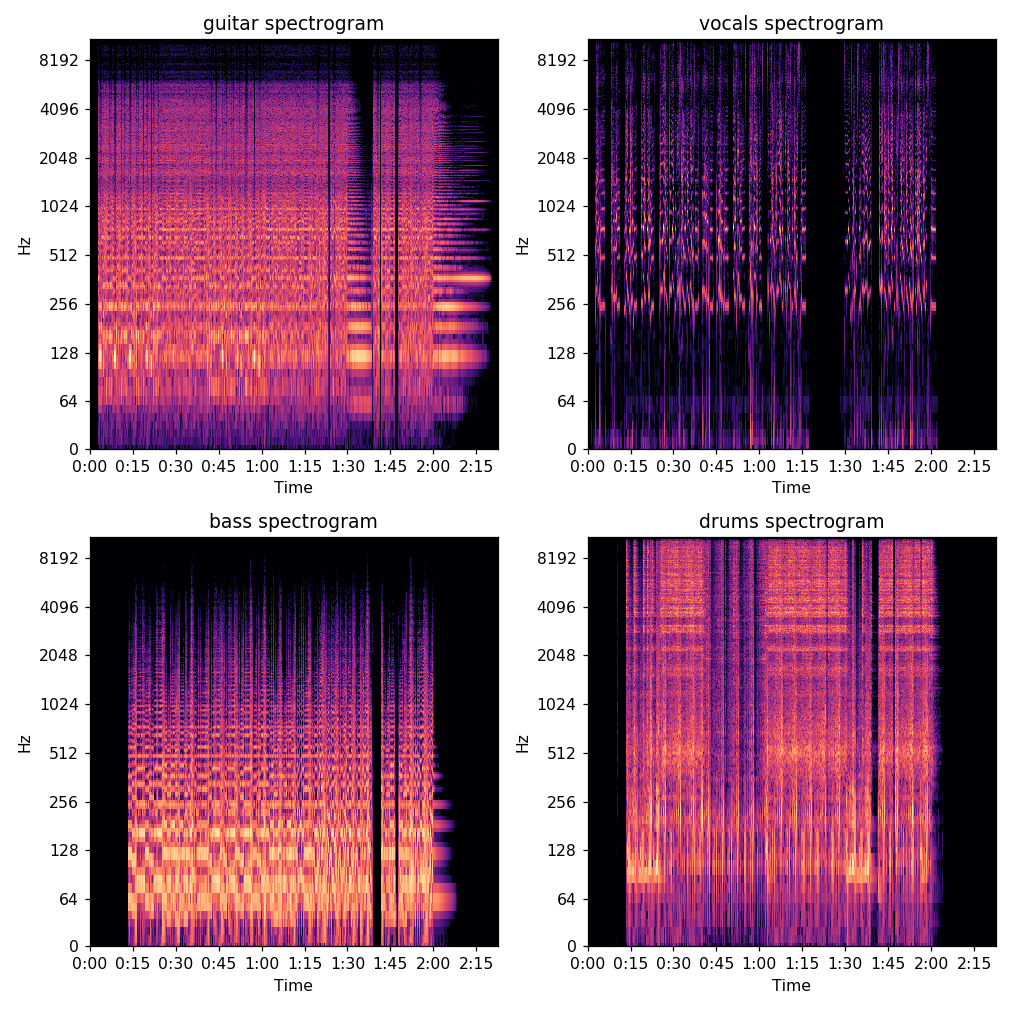

In [3]:
fig, axes = plt.subplots(figsize=(9, 9), nrows=2, ncols=2)

for track, name, ax in zip([guitar, vocals, bass, drums], 
                           ['guitar', 'vocals', 'bass', 'drums'], 
                           axes.flatten()):
    track_amp = librosa.stft(track)
    track_db = librosa.amplitude_to_db(np.abs(track_amp), ref=np.max)
    
    librosa.display.specshow(track_db, y_axis='log', x_axis='time', ax=ax)
    ax.set_title(f'{name} spectrogram')
    
plt.tight_layout()

Listen to it now:

In [4]:
track = guitar+vocals+bass+drums
Audio(track, rate=rate)

Track spectrogram:

<IPython.core.display.Javascript object>


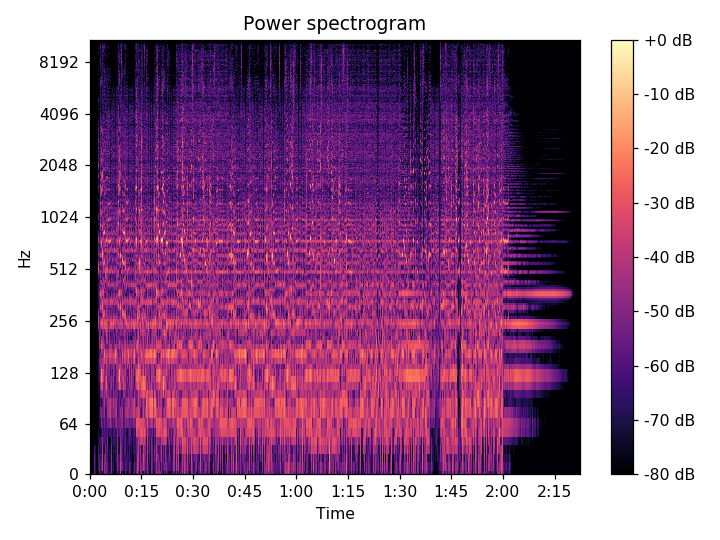

In [5]:
track_amp = librosa.stft(track)
track_db = librosa.amplitude_to_db(np.abs(track_amp), ref=np.max)

plt.figure()
librosa.display.specshow(track_db, y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

Source signals:

In [6]:
S = np.c_[guitar, vocals, bass, drums]

Random mixing matrix that emulates recording from 4 microphones at different lcoations:

In [7]:
A = np.random.random(size=(4, 4))
A = A / A.sum(axis=0)

Observed signals:

In [8]:
X = S @ A

Now let's listen to them as well:

In [ ]:
Audio(X[..., 0], rate=rate)

In [ ]:
Audio(X[..., 1], rate=rate)

In [ ]:
Audio(X[..., 2], rate=rate)

In [ ]:
Audio(X[..., 3], rate=rate)

## Separation using `FastICA`

In [10]:
ica = FastICA(n_components=4)

# as simple as invoking a single function:
Shat = ica.fit_transform(X)

Let's give a listen to what the algorithm has found:

In [ ]:
Audio(Shat[..., 0], rate=rate)

In [ ]:
Audio(Shat[..., 1], rate=rate)

In [ ]:
Audio(Shat[..., 2], rate=rate)

In [ ]:
Audio(Shat[..., 3], rate=rate)

Most tracks sound perfectly fine, although the bass line contains some drums artifacts.

Let's look on the spectrogram again:

<IPython.core.display.Javascript object>


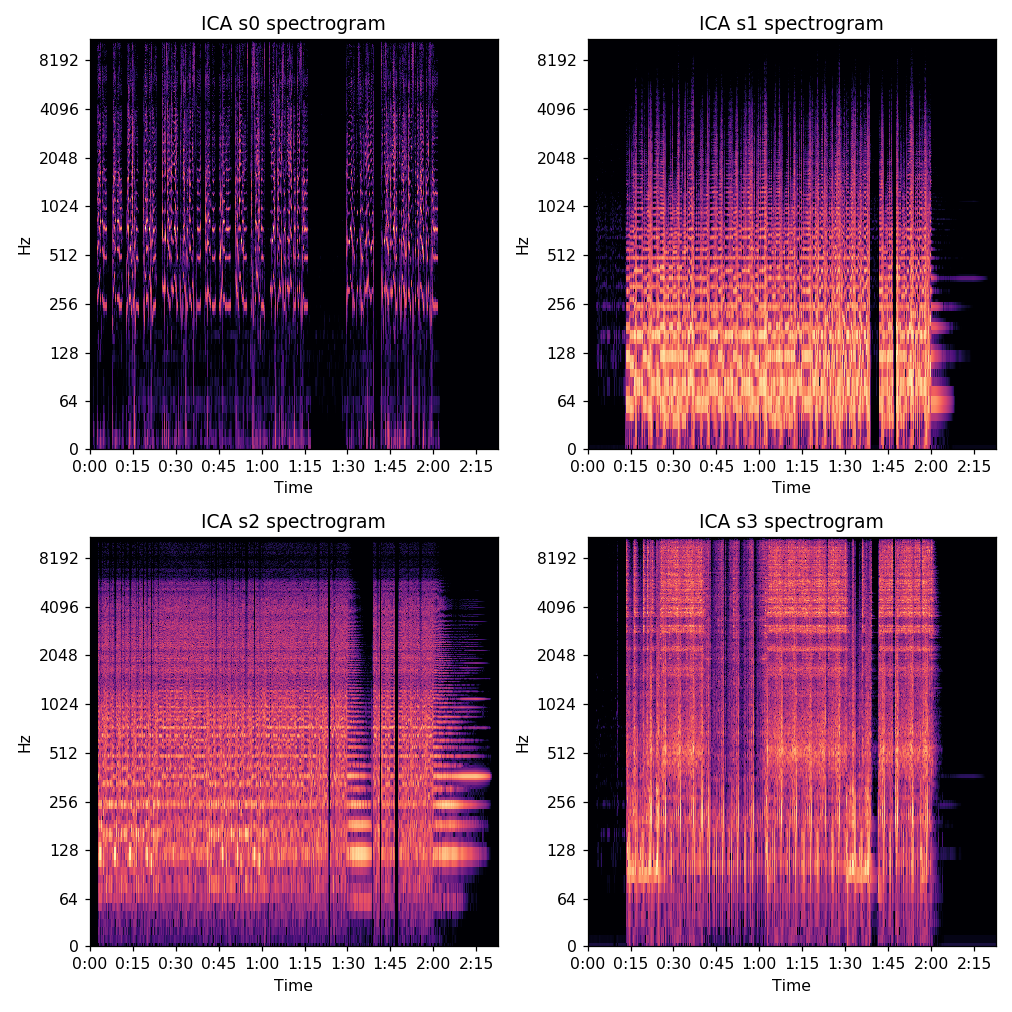

In [11]:
fig, axes = plt.subplots(figsize=(9, 9), nrows=2, ncols=2)

for k, ax in enumerate(axes.flatten()):
    track_amp = librosa.stft(Shat[..., k].copy())
    track_db = librosa.amplitude_to_db(np.abs(track_amp), ref=np.max)
    
    librosa.display.specshow(track_db, y_axis='log', x_axis='time', ax=ax)
    ax.set_title(f'ICA s{k} spectrogram')
    
plt.tight_layout()

Here we are able to see the decent correspondance between original sources and our estimations.

## Separation using `NMF`

In [13]:
nmf = NMF(n_components=4)

# we need to normalize X first:
X_n = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

Shat = nmf.fit_transform(X_n)

And... here everything breaks.

In [ ]:
Audio(Shat[..., 0], rate=rate)

In [ ]:
Audio(Shat[..., 1], rate=rate)

In [ ]:
Audio(Shat[..., 2], rate=rate)

In [ ]:
Audio(Shat[..., 3], rate=rate)

Expectedly, the spectrogram is complete mess with no clearly distinguishable tracks:

<IPython.core.display.Javascript object>


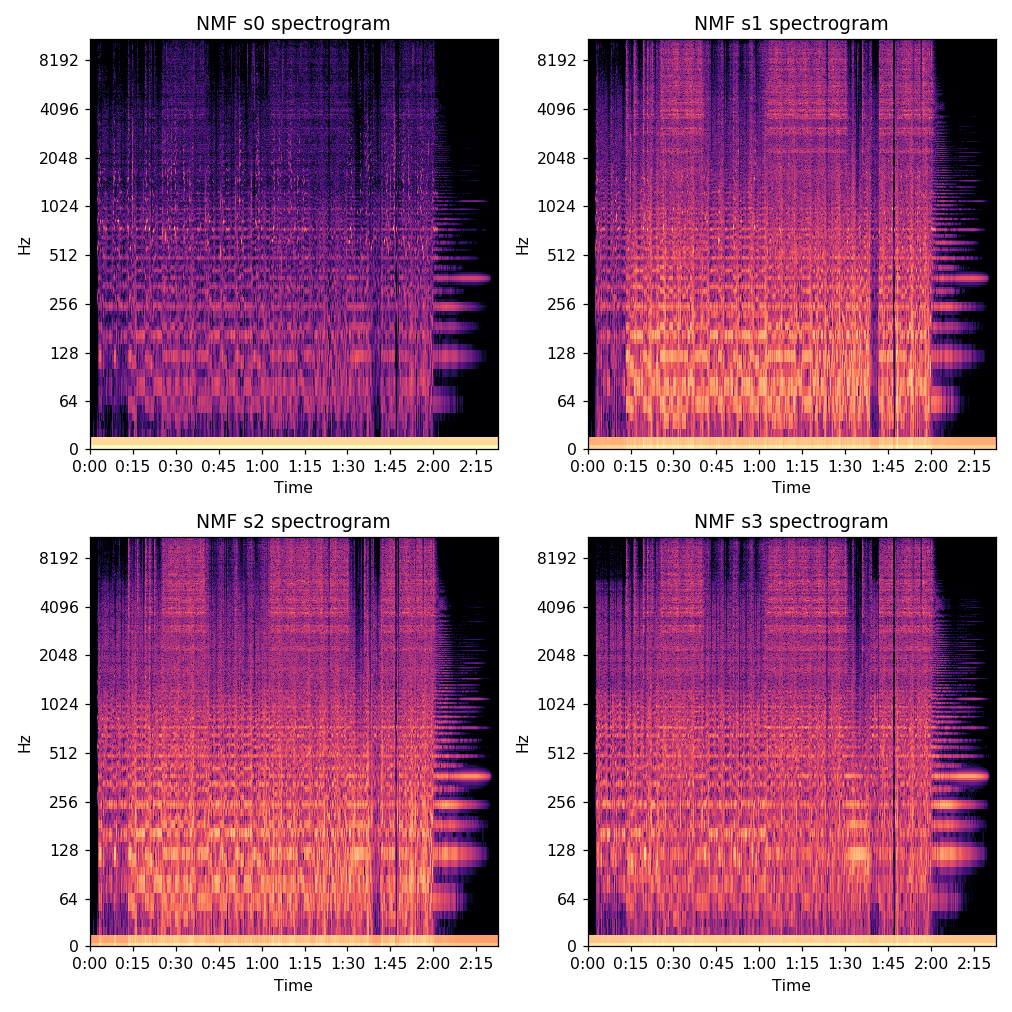

In [14]:
fig, axes = plt.subplots(figsize=(9, 9), nrows=2, ncols=2)

for k, ax in enumerate(axes.flatten()):
    track_amp = librosa.stft(Shat[..., k].copy())
    track_db = librosa.amplitude_to_db(np.abs(track_amp), ref=np.max)
    
    librosa.display.specshow(track_db, y_axis='log', x_axis='time', ax=ax)
    ax.set_title(f'NMF s{k} spectrogram')
    
plt.tight_layout()